Script for decision tree classification of heart disease data

In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, validation_curve
from sklearn import metrics
import os


In [2]:
col_names = ['age', 'sex', 'chest-pain', 'restbps', 'cholesterol', 'fasting-bs', 'rest-ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'colored-v', 'thal', 'num']
feature_cols = ['age', 'sex', 'chest-pain', 'restbps', 'cholesterol', 'fasting-bs', 'rest-ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'colored-v', 'thal']

load dataset

In [3]:
heart = pd.read_csv("processed.cleveland.data", header=None, names=col_names)

In [4]:
X = heart[feature_cols] # Features
y = heart['num'] # Target variable

In [5]:
# Get names of indexes for which column Age has value 30
for feature in feature_cols:
    indexNames = X[X[feature] == '?' ].index
    # Delete these row indexes from dataFrame
    X.drop(indexNames , inplace=True)
    y.drop(indexNames , inplace=True)

/home/deandret/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/deandret/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
#X.applymap(np.isreal)

In [7]:
X = X.to_numpy()
y = y.to_numpy()

In [8]:
cv_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)

Text(0.5, 1.0, 'Average score: 0.4952561854665888')

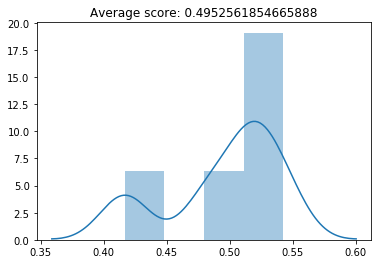

In [9]:
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 1)

In [12]:
clf = DecisionTreeClassifier()

In [11]:
#Old Kfold method
'''
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Split dataset into training set and test set
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
'''

'\nskf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)\n\n# Split dataset into training set and test set\nfor train_index, test_index in skf.split(X, y):\n    print("TRAIN:", train_index, "TEST:", test_index)\n    X_train, X_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n'

In [13]:
# make an array of depths to choose from, say 1 to 20
depths = np.arange(1, 21)
num_leafs = np.arange(1,50)
#GridSearch
param_grid = [{'max_depth':depths, 'min_samples_leaf':num_leafs}]
gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

In [14]:
gs = gs.fit(X, y)

/home/deandret/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
#print(gs.best_score_)
#print(gs.best_params_)
print(gs.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


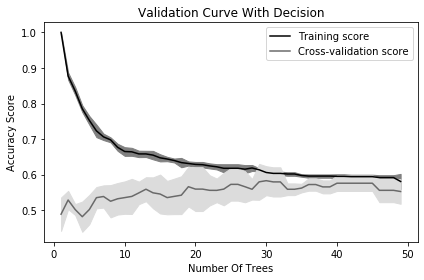

In [17]:
#Plot validation curve with leafs in nodes, DO with max depth
# Create range of values for parameter
param_range = np.arange(1, 50)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), 
                                             X, 
                                             y, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Decision")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [19]:
my_model = gs.best_estimator_
my_model.fit(X_train, y_train)

y_predictor = my_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predictor))
print(metrics.mean_squared_error(y_test, y_predictor))

Accuracy: 0.5833333333333334
1.0


In [18]:
#Working on function for evalution metrods
def evals(y_test_truth, y_predictions):
    acc=metrics.accuracy_score(y_test_truth, y_predictions)
    mse=metrics.mean_squared_error(y_test_truth, y_predictions)
    c_report=metrics.classification_report(y_test_truth, y_predictions)
    confusion_m=metrics.confusion_matrix(y_test_truth, y_predictions)
    return(acc, mse,c_report, confusion_m)

In [20]:
evals(y_test,y_predictor)

/home/deandret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.5833333333333334,
 1.0,
 '              precision    recall  f1-score   support\n\n           0       0.66      0.97      0.78        30\n           1       0.00      0.00      0.00        10\n           2       0.30      0.27      0.29        11\n           3       0.50      0.38      0.43         8\n           4       0.00      0.00      0.00         1\n\n    accuracy                           0.58        60\n   macro avg       0.29      0.32      0.30        60\nweighted avg       0.45      0.58      0.50        60\n',
 array([[29,  0,  1,  0,  0],
        [ 7,  0,  2,  1,  0],
        [ 7,  0,  3,  1,  0],
        [ 1,  0,  4,  3,  0],
        [ 0,  0,  0,  1,  0]]))

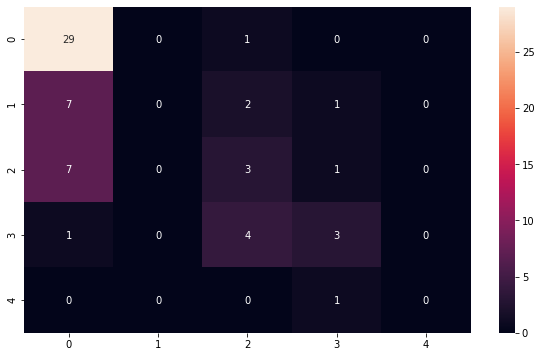

In [31]:
#Confusion matrix graph
cm=metrics.confusion_matrix(y_test, y_predictor)
index = ['0-NP','1-P','2-P','3-P','4-P']  
columns = ['0-NP','1-P','2-P','3-P','4-P']
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)